In [1]:
from PlottingTools.Plotter import Plotter, DrawDataVsMC
import ROOT

Welcome to JupyROOT 6.10/09

Applying ATLAS style settings...



In [2]:
from inputs.samples import INPUT

First import the plotter. INPUT is a file from the folder inputs/samples.py. This contains a dictionary of files that the plotter will run over. For now we're using the tree: EoverP_ClusterEnergyLCWInDetTrackParticlesLoose_tree. All energy deposits are summed from LCW weighted tracks.

In [3]:
plots = Plotter(INPUT, "EoverP_ClusterEnergyLCWInDetTrackParticlesLoose_tree")

Next, we need to get the number of tracks in data and MC, and set it so that MC is normalized to the data.

In [4]:
DataTracks = plots.GetNumberOfTracks("MinBiasData")
MCTracks = plots.GetNumberOfTracks("PythiaJetJet")
print("This is the normalization of MC to Data", DataTracks/MCTracks)
plots.SetNormalization("PythiaJetJet", DataTracks/MCTracks)

('This is the normalization of MC to Data', 0.014078152733573077)


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


Next import a set of variables that we are interested in plotting. You can write your own variables that you want plot. Just look inside files like variables/variables.py and selections/selections.py

In [5]:
from variables.variables import calc_trkP, calc_EOP, calc_trkPt, calc_trkAverageMu
from selections.selections import sel_NTRT20, sel_NTRT25, sel_NTRT30, sel_Eta0_6, sel_PGreater1 ,sel_PGreater1_5, sel_PGreater2, sel_PGreater2_5

Next lets get the histograms for the average mu for all of our tracks. Lets use this histogram to normalize MC to data

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet


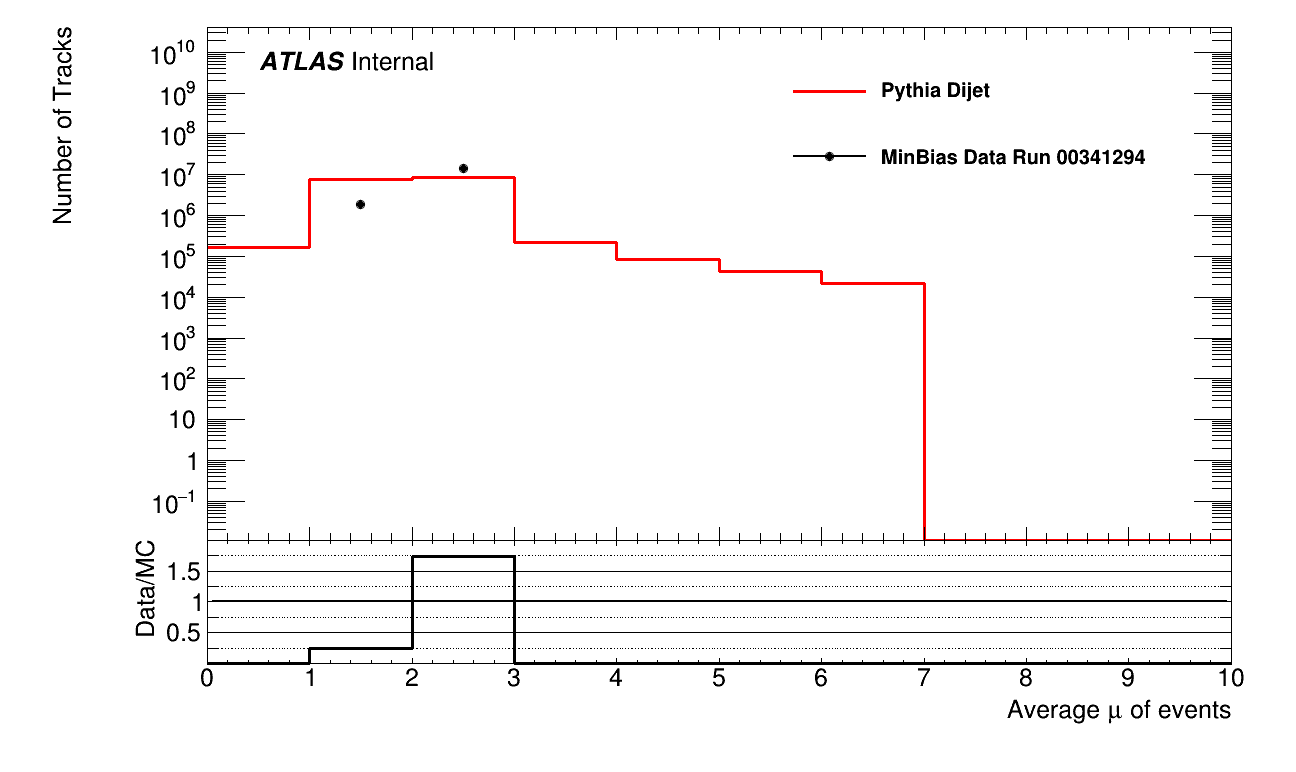

In [6]:
trkAverageMuHist = plots.GetHistograms(calc_trkAverageMu, list_selections = [], nBins = 10, range_low = 0.0, range_high = 10, xlabel ="Average #mu of events", ylabel = "Number of Tracks")
DataVsMC = DrawDataVsMC(trkAverageMuHist, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')
DataVsMC.Draw()

Now we want to reweight the average mu distribution in MC to the one in data. If you call this function, the average mu will be normalized no matter what variable you are plotting. The first string is the name of the channel to be normalized, in this case we are normalizing channel "PythiaJetJet". The second channel is the the one we are normalizing to. In this case it is the "MinBiasData".

In [7]:
plots.UseVariableAndHistogramToNormalize(calc_trkAverageMu, trkAverageMuHist, "PythiaJetJet", "MinBiasData")

Now lets plot the average mu to make sure that everything is normalized. Data and MC should agree 100%.

In [8]:
trkAverageMuHist = plots.GetHistograms(calc_trkAverageMu, list_selections = [], nBins = 10, range_low = 0, range_high = 10, xlabel ="Average #mu of Event", ylabel = "Number of Tracks.")

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting NormalizationHistogramtrkAverageMuPythiaJetJet
Please be patient. We are calculating this for the first time, and it may take some time
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting NormalizationHistogramtrkAverageMuPythiaJetJet
Please be patient. We are calculating this for the first time, and it may take some time
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.

Warning in <TROOT::Append>: Replacing existing TH1: trkAverageMu_MinBiasData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: trkAverageMu_PythiaJetJet (Potential memory leak).


In [9]:
DataVsMC = DrawDataVsMC(trkAverageMuHist, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: PythiaJetJetMinBiasDatatrkAverageMu_PythiaJetJet


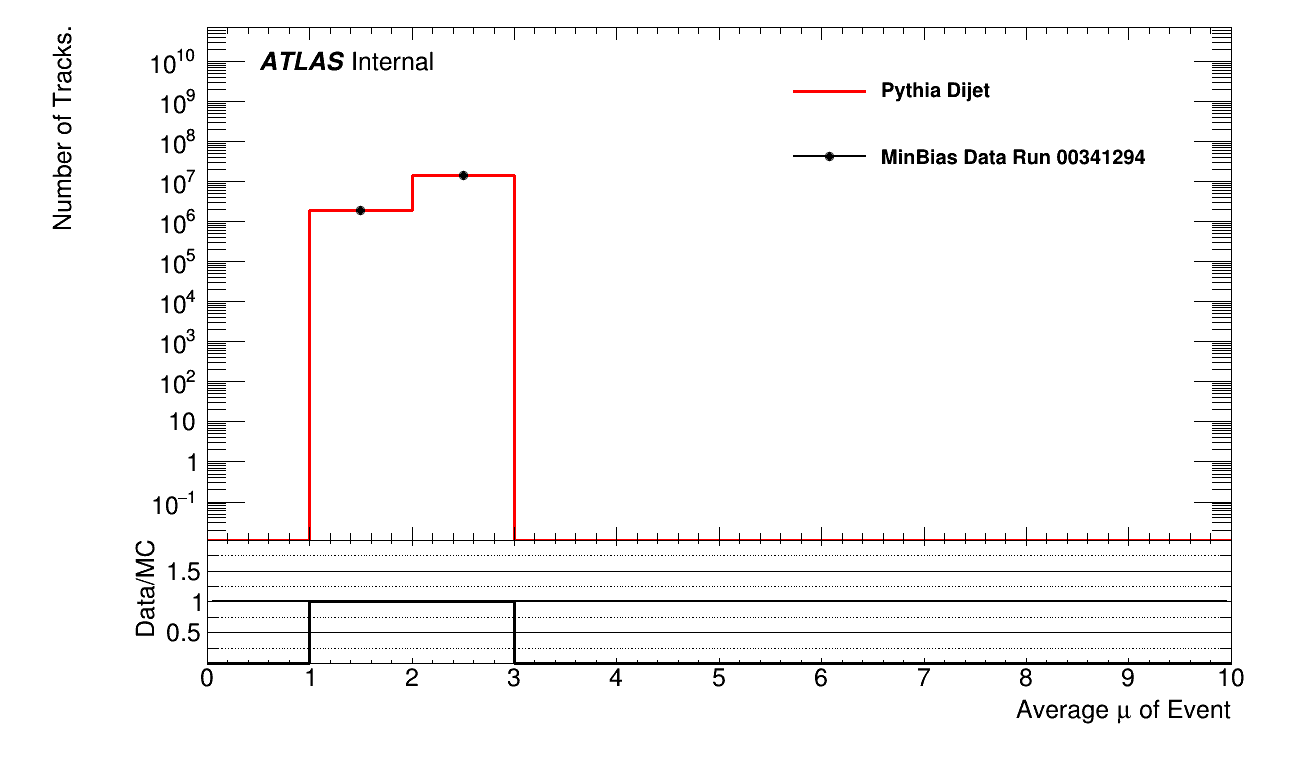

In [10]:
DataVsMC.Draw()

Voila! MC and Data agree perfectly now. Now we should look at the track pT spectrum for data and MC

In [11]:
trkPtHist = plots.GetHistograms(calc_trkPt, list_selections = [], nBins = 500, range_low = 0.5, range_high = 60, xlabel ="Track P_{T} [GeV]", ylabel = "Number of Tracks")

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu


In [12]:
DataVsMC = DrawDataVsMC(trkPtHist, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')

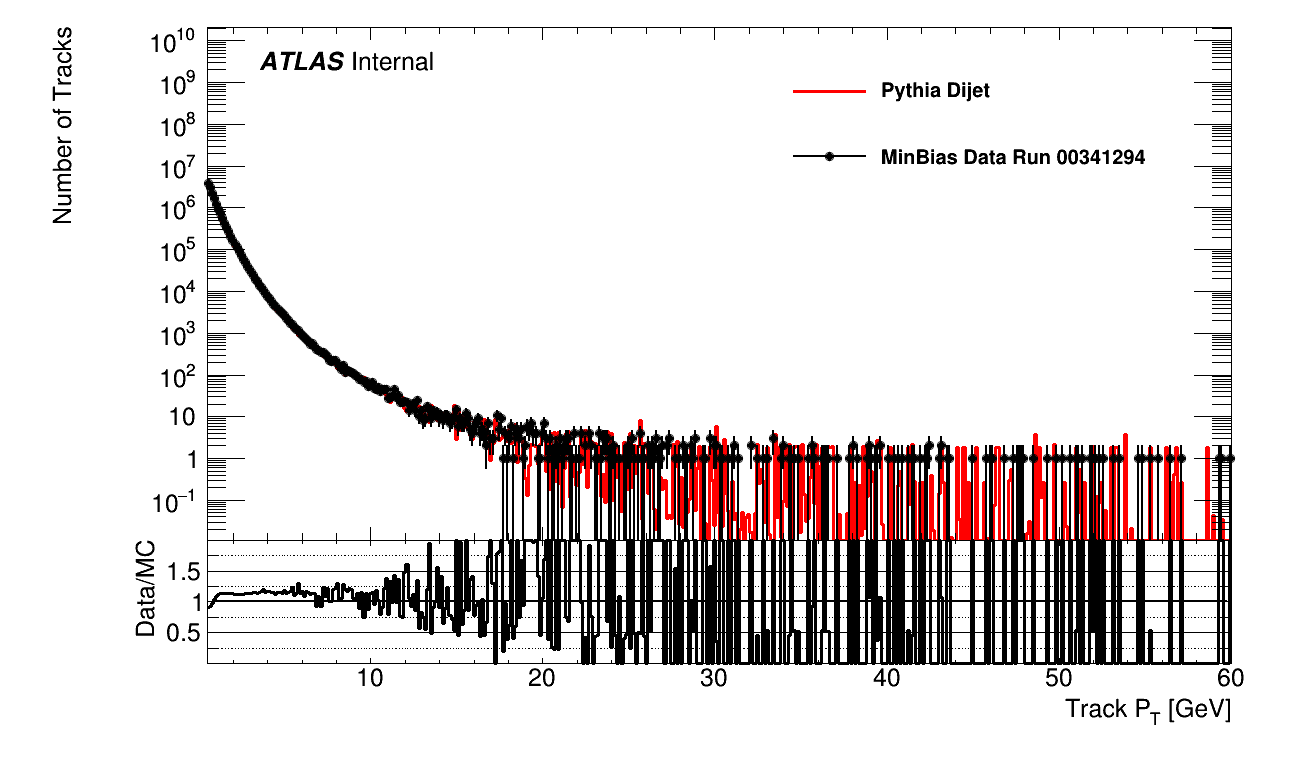

In [13]:
DataVsMC.Draw()

In [14]:
plots.UseVariableAndHistogramToNormalize(calc_trkPt, trkPtHist, "PythiaJetJet", "MinBiasData")

Now Lets check to see if the pT spectrum has been reweighted so that data and MC agree

In [15]:
trkPtHist = plots.GetHistograms(calc_trkPt, list_selections = [], nBins = 100, range_low = 0.5, range_high = 60, xlabel ="Track P_{T}", ylabel = "Number of Tracks")

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting NormalizationHistogramtrkPtPythiaJetJet
Please be patient. We are calculating this for the first time, and it may take some time
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting NormalizationHistogramtrkPtPythiaJetJet
Please be patient. We are calculating this for the first time, and it may take some time
Reading from file /Users/lukasadamek

Warning in <TROOT::Append>: Replacing existing TH1: trkPt_MinBiasData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: trkPt_PythiaJetJet (Potential memory leak).


In [16]:
DataVsMC = DrawDataVsMC(trkPtHist, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: PythiaJetJetMinBiasDatatrkPt_PythiaJetJet


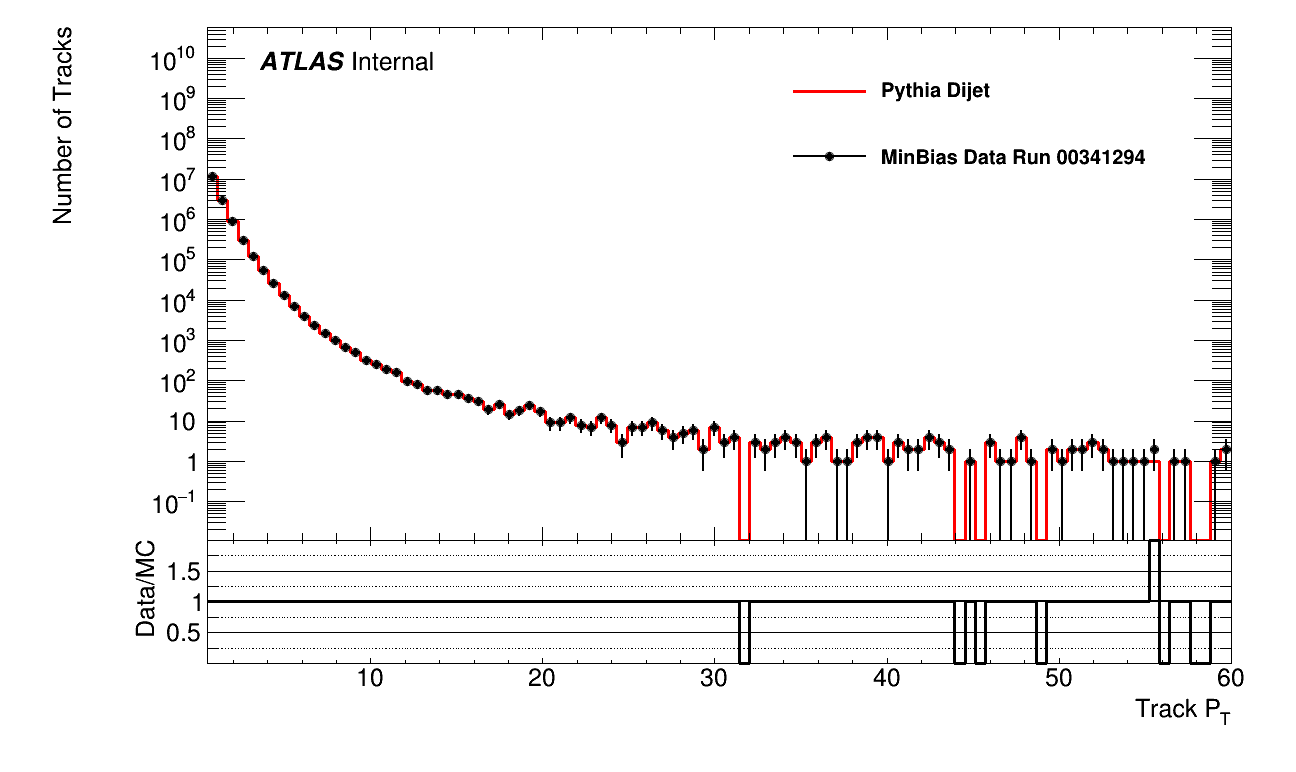

In [17]:
DataVsMC.Draw()

Now lets check to see if the mu distribution is still the same between data and MC

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweight

Warning in <TROOT::Append>: Replacing existing TH1: trkAverageMu_MinBiasData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: trkAverageMu_PythiaJetJet (Potential memory leak).


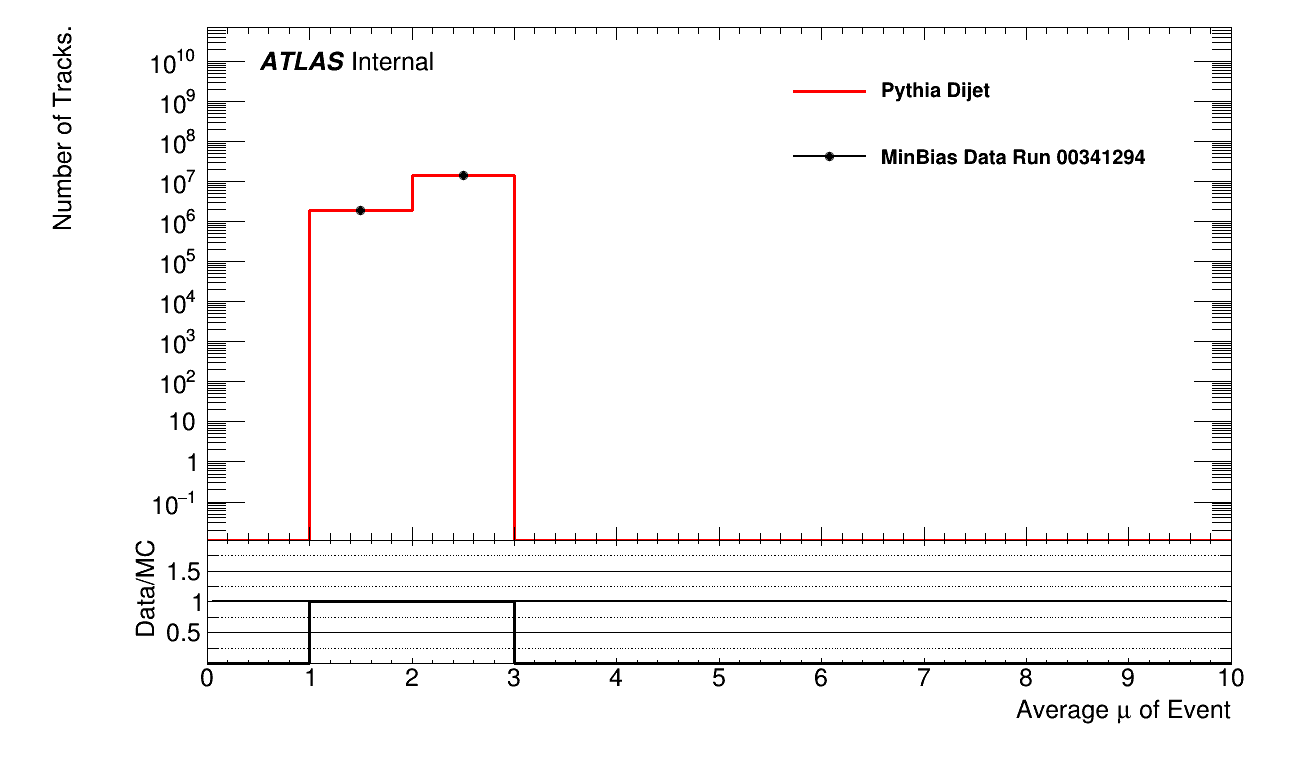

In [18]:
trkAverageMuHist2 = plots.GetHistograms(calc_trkAverageMu, list_selections = [], nBins = 10, range_low = 0, range_high = 10, xlabel ="Average #mu of Event", ylabel = "Number of Tracks.")
DataVsMCAverageMuHist2 = DrawDataVsMC(trkAverageMuHist2, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')
DataVsMCAverageMuHist2.Draw()

Great! Now lets start looking at some E/p distributions. First lets look at the inclusive distribution, and then slowly make the selections tighter and tighter.

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweight

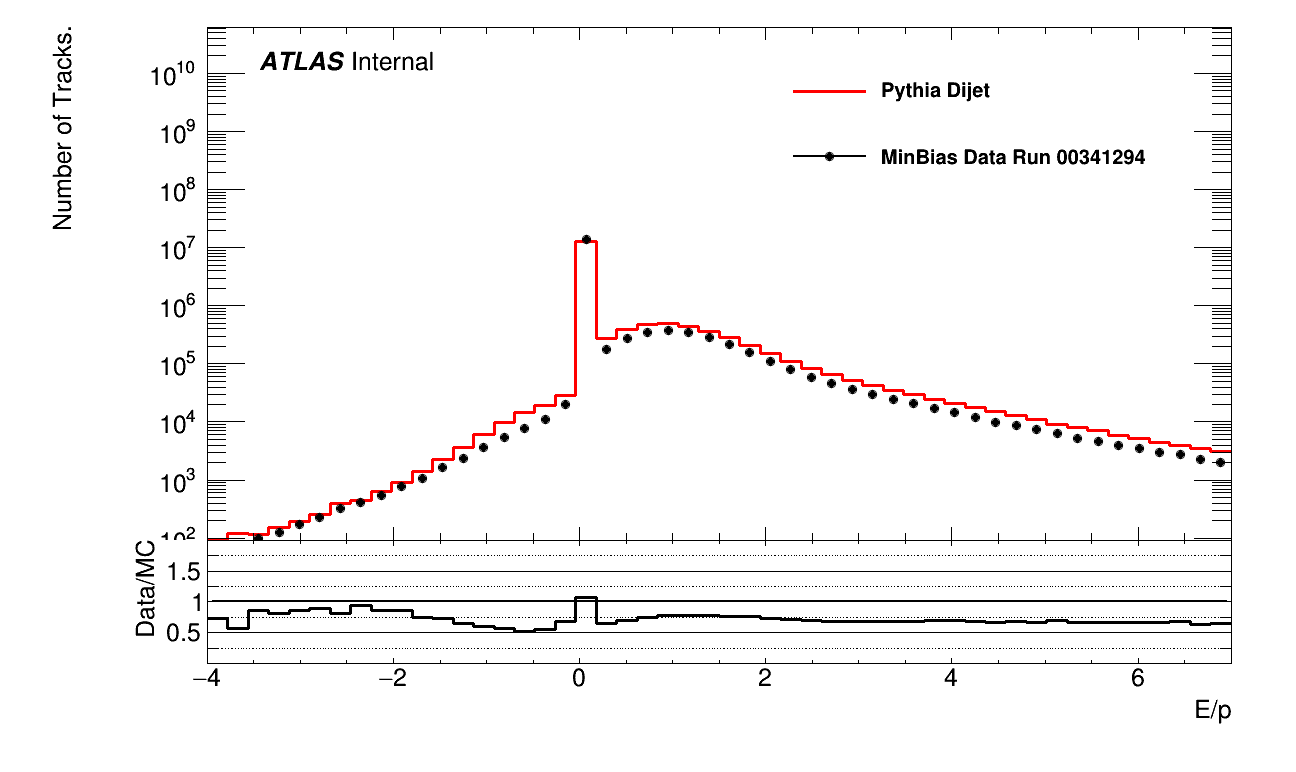

In [19]:
selections = []
trkEOPHist = plots.GetHistograms(calc_EOP, list_selections = selections, nBins = 50, range_low = -4, range_high = 7, xlabel ="E/p", ylabel = "Number of Tracks.")
DataVsMCEOP = DrawDataVsMC(trkEOPHist, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')
DataVsMCEOP.Draw()

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweight

Warning in <TROOT::Append>: Replacing existing TH1: EOP_MinBiasData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EOP_PythiaJetJet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: PythiaJetJetMinBiasDataEOP_PythiaJetJet


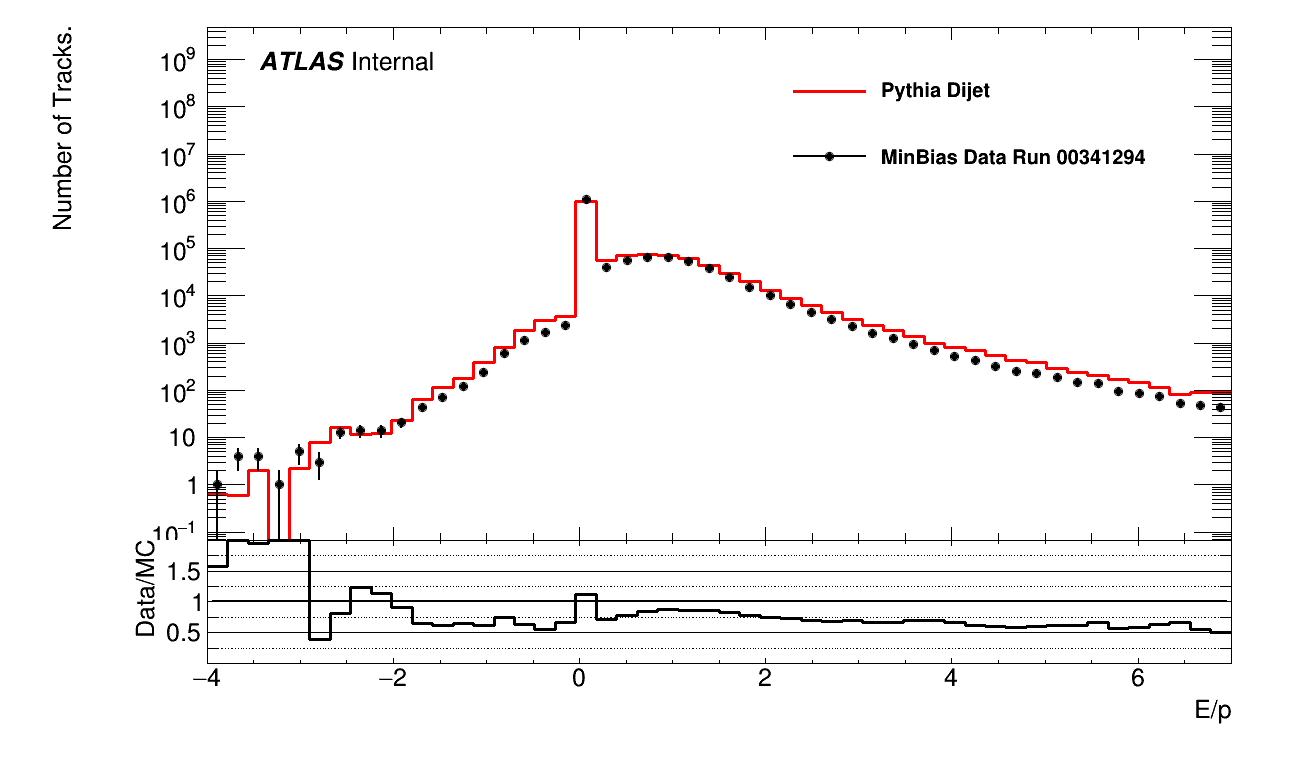

In [20]:
selections = [sel_PGreater1, sel_Eta0_6]
trkEOPHistPGreater1 = plots.GetHistograms(calc_EOP, list_selections = selections, nBins = 50, range_low = -4, range_high = 7, xlabel ="E/p", ylabel = "Number of Tracks.")
DataVsMCEOP = DrawDataVsMC(trkEOPHistPGreater1, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')
DataVsMCEOP.Draw()

The number of events below and above the trheshold do not at all agree between data and MC. Maybe we should be making tighter selections on the tracks. Really make sure that they are above the threshold to seed a deposit in the calorimter. Look at Eta in between 0 and 0.6, and look at tracks with p > 1 GeV

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweight

Warning in <TROOT::Append>: Replacing existing TH1: EOP_MinBiasData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EOP_PythiaJetJet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: PythiaJetJetMinBiasDataEOP_PythiaJetJet


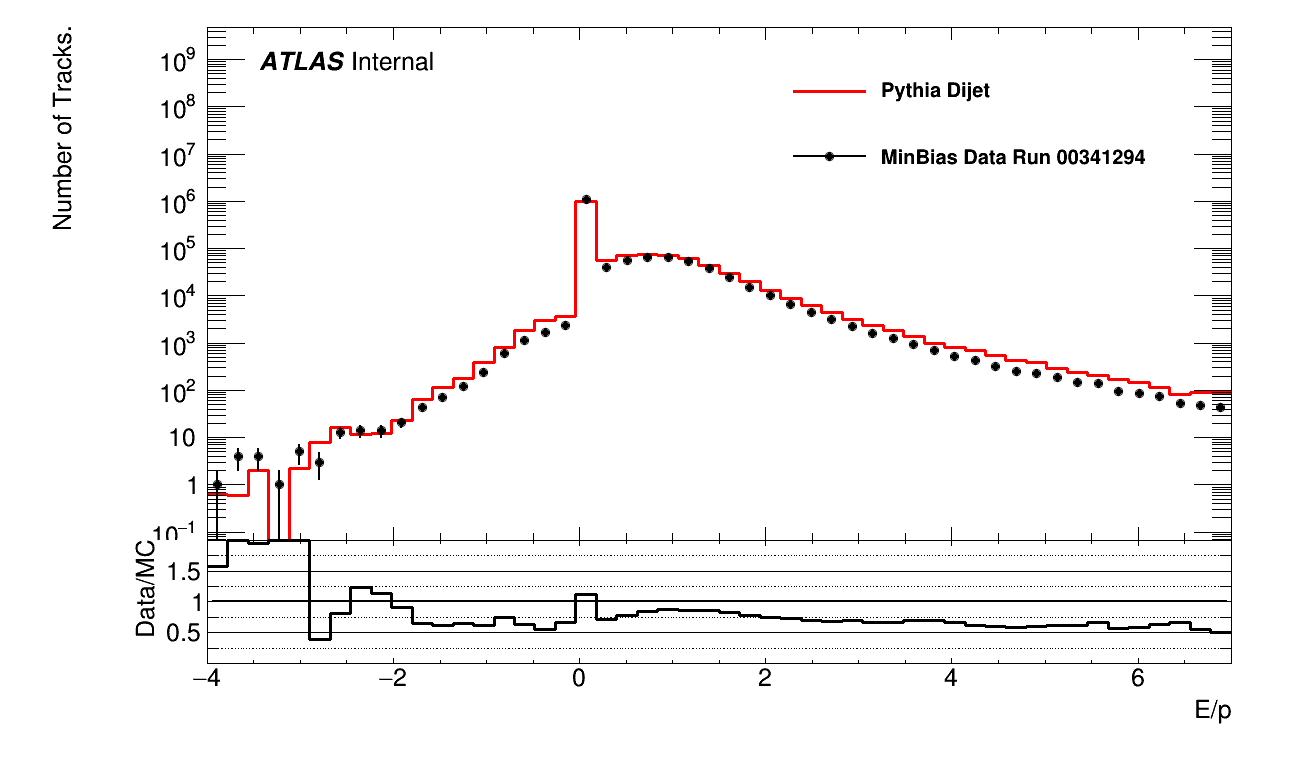

In [21]:
selections = [sel_PGreater1_5, sel_Eta0_6]
trkEOPHistPGreater1_5 = plots.GetHistograms(calc_EOP, list_selections = selections, nBins = 50, range_low = -4, range_high = 7, xlabel ="E/p", ylabel = "Number of Tracks.")
DataVsMCEOP = DrawDataVsMC(trkEOPHistPGreater1, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')
DataVsMCEOP.Draw()

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweight

Warning in <TROOT::Append>: Replacing existing TH1: EOP_MinBiasData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EOP_PythiaJetJet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: PythiaJetJetMinBiasDataEOP_PythiaJetJet


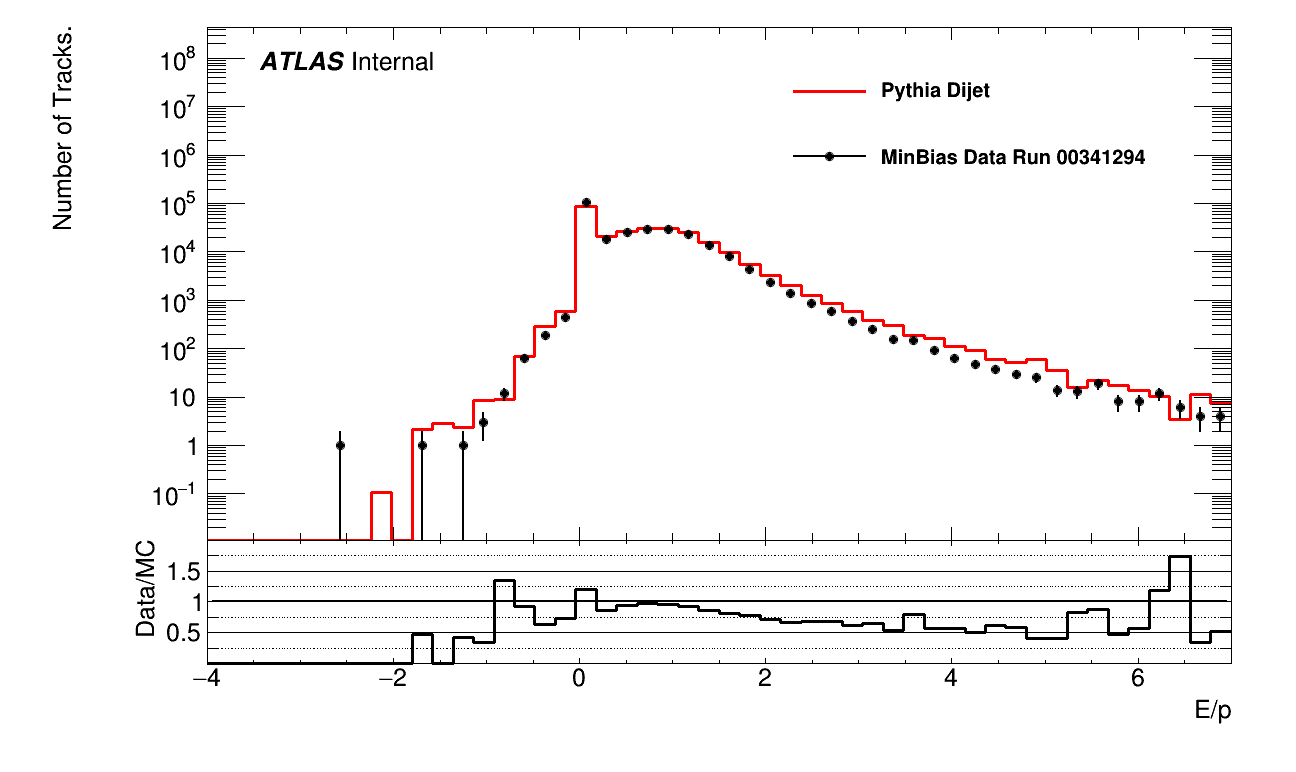

In [22]:
selections = [sel_PGreater2, sel_Eta0_6]
trkEOPHistPGreater2 = plots.GetHistograms(calc_EOP, list_selections = selections, nBins = 50, range_low = -4, range_high = 7, xlabel ="E/p", ylabel = "Number of Tracks.")
DataVsMCEOP = DrawDataVsMC(trkEOPHistPGreater2, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')
DataVsMCEOP.Draw()

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweight

Warning in <TROOT::Append>: Replacing existing TH1: EOP_MinBiasData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EOP_PythiaJetJet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: PythiaJetJetMinBiasDataEOP_PythiaJetJet


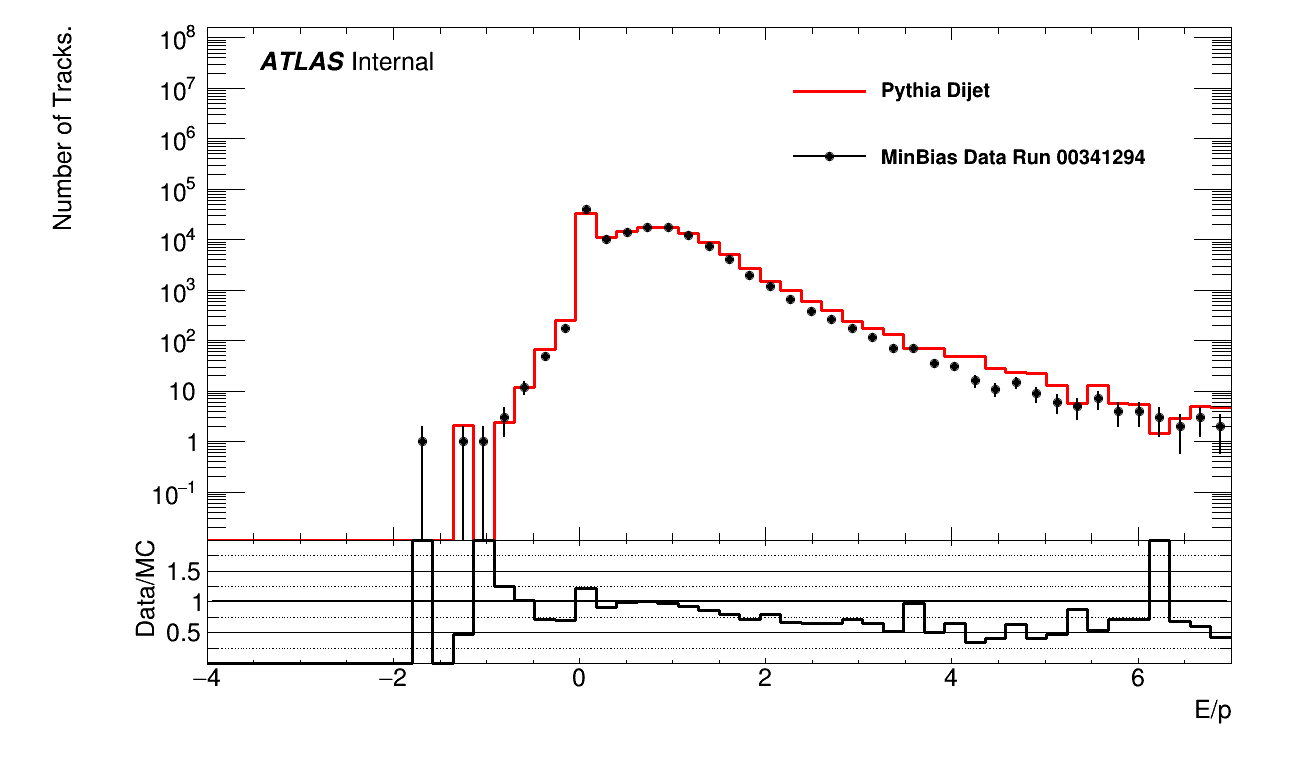

In [23]:
selections = [sel_PGreater2_5, sel_Eta0_6]
trkEOPHistPGreater2_5 = plots.GetHistograms(calc_EOP, list_selections = selections, nBins = 50, range_low = -4, range_high = 7, xlabel ="E/p", ylabel = "Number of Tracks.")
DataVsMCEOP = DrawDataVsMC(trkEOPHistPGreater2_5, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')
DataVsMCEOP.Draw()

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweight

Warning in <TROOT::Append>: Replacing existing TH1: EOP_MinBiasData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EOP_PythiaJetJet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: PythiaJetJetMinBiasDataEOP_PythiaJetJet


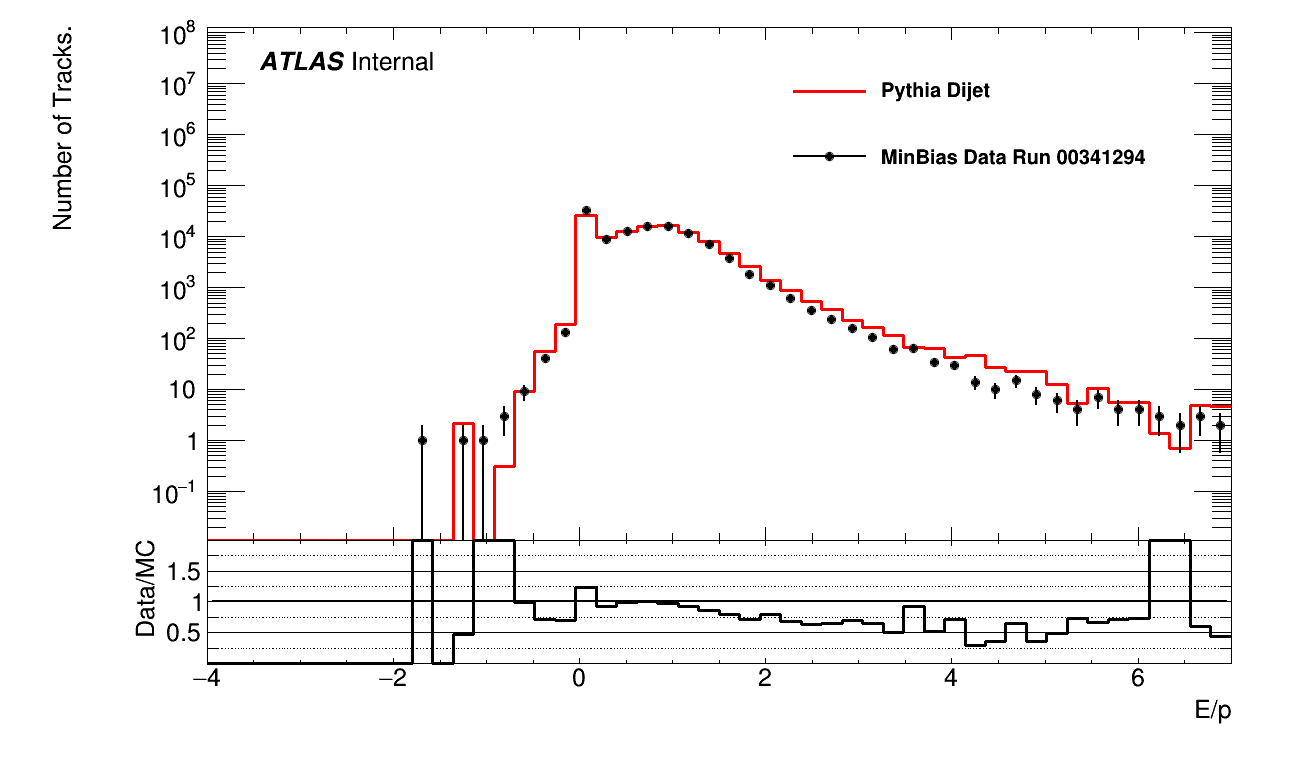

In [24]:
selections = [sel_PGreater2_5, sel_Eta0_6, sel_NTRT20]
trkEOPHistPGreater2_5 = plots.GetHistograms(calc_EOP, list_selections = selections, nBins = 50, range_low = -4, range_high = 7, xlabel ="E/p", ylabel = "Number of Tracks.")
DataVsMCEOP = DrawDataVsMC(trkEOPHistPGreater2_5, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')
DataVsMCEOP.Draw()

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweight

Warning in <TROOT::Append>: Replacing existing TH1: EOP_MinBiasData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EOP_PythiaJetJet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: PythiaJetJetMinBiasDataEOP_PythiaJetJet


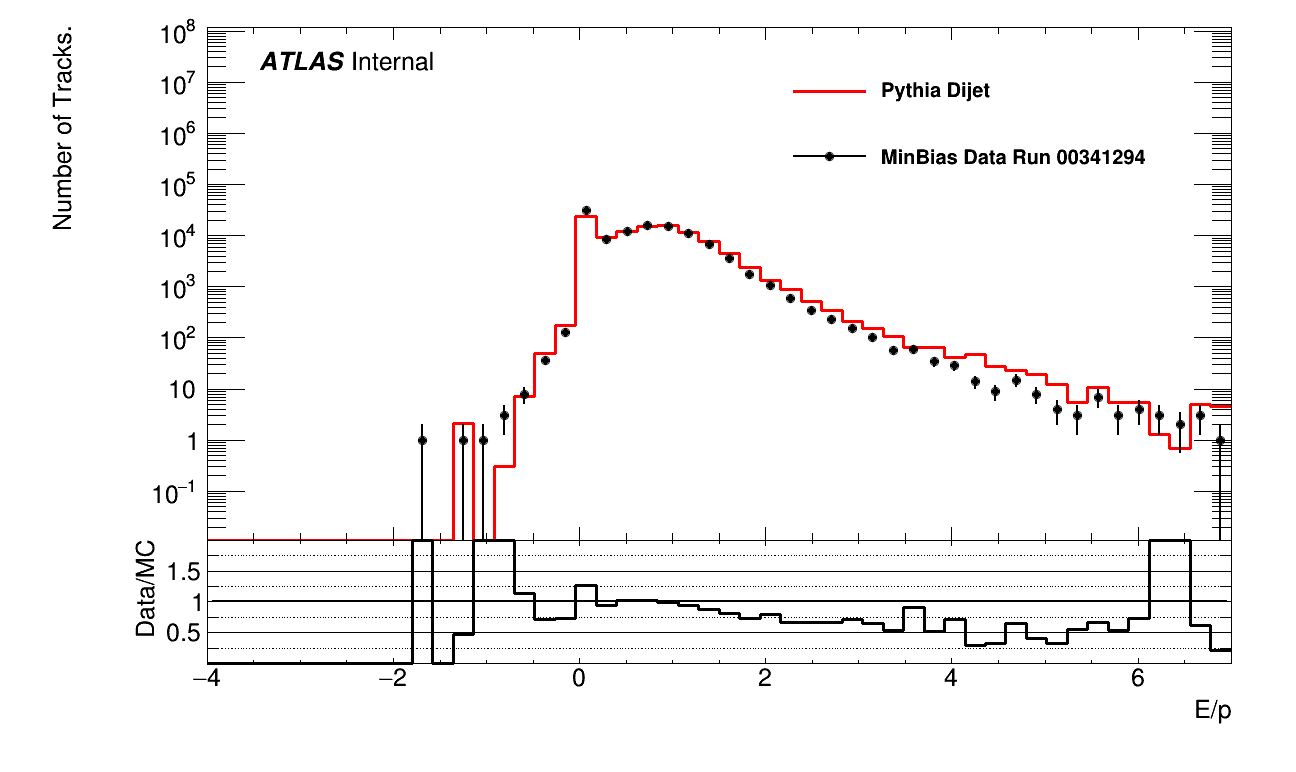

In [25]:
selections = [sel_PGreater2_5, sel_Eta0_6, sel_NTRT25]
trkEOPHistPGreater2_5 = plots.GetHistograms(calc_EOP, list_selections = selections, nBins = 50, range_low = -4, range_high = 7, xlabel ="E/p", ylabel = "Number of Tracks.")
DataVsMCEOP = DrawDataVsMC(trkEOPHistPGreater2_5, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')
DataVsMCEOP.Draw()

Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.luadamek.data17_13TeV.00341294.Sept26_EOPTree_hist
Corresponding to channel MinBiasData
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361020.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361021.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweighting for variable trkPt
Reading from file /Users/lukasadamek/cernbox/EOPTuples/haddedTogether/EOPTuples_v02/user.luadamek.mc16_13TeV.361022.jetjet.Sept21_2018_EOP_noTrigger_hist
Corresponding to channel PythiaJetJet
Applying reweighting for variable trkAverageMu
Applying reweight

Warning in <TROOT::Append>: Replacing existing TH1: EOP_MinBiasData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EOP_PythiaJetJet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: PythiaJetJetMinBiasDataEOP_PythiaJetJet


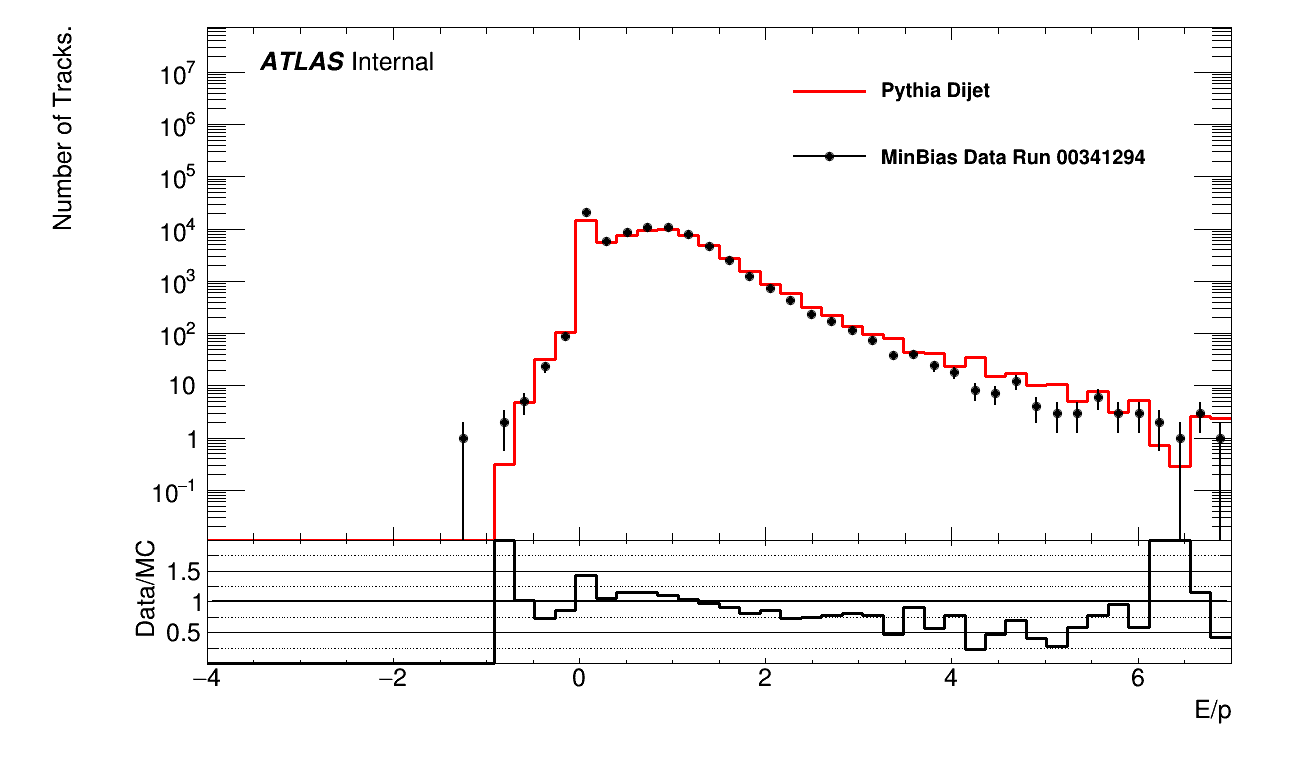

In [26]:
selections = [sel_PGreater2_5, sel_Eta0_6, sel_NTRT30]
trkEOPHistPGreater2_5 = plots.GetHistograms(calc_EOP, list_selections = selections, nBins = 50, range_low = -4, range_high = 7, xlabel ="E/p", ylabel = "Number of Tracks.")
DataVsMCEOP = DrawDataVsMC(trkEOPHistPGreater2_5, plots.channelLabels, MCKey='PythiaJetJet', DataKey='MinBiasData')
DataVsMCEOP.Draw()